[[ -8.28015084 -11.91087598]
 [ -7.19683996   6.56802051]
 [ 10.27131728 -14.70465883]
 [ 14.43515101  13.24025349]
 [-13.51412937 -11.17022177]
 [ -9.8543022   13.04919452]
 [ 14.78500687 -12.13288985]
 [  9.45474482   5.49828408]
 [ -7.99602319  -7.1201087 ]
 [-11.50818731   5.69724678]
 [ 11.15399851  -5.46298946]
 [ 11.76571124   6.74766474]
 [-13.29456863  -7.60279538]
 [-13.80964262  12.67802998]
 [  7.33813132  -7.79283394]
 [ 10.76902215  14.12129014]
 [ -6.39224439 -14.58908279]
 [-12.53310277  14.48955761]
 [ 12.88706098 -14.67631448]
 [ 11.65190032  13.76205935]
 [ -5.27179549 -10.99848098]
 [ -5.62410903  14.64235181]
 [  5.63134178  -7.90280079]
 [ 14.95123093  10.97804164]
 [ -9.37978649  -7.74520456]
 [ -5.11366512   9.24899377]
 [ 13.2106215   -6.26104562]
 [ 14.02968137   5.34969796]
 [-11.05761666 -11.54275943]
 [ -9.69403941   7.58537643]
 [  9.37188567 -12.59389   ]
 [ 10.4757151    6.63337688]
 [-13.71080291  -7.14414437]
 [-12.49038328  14.25068523]
 [  6.37878882

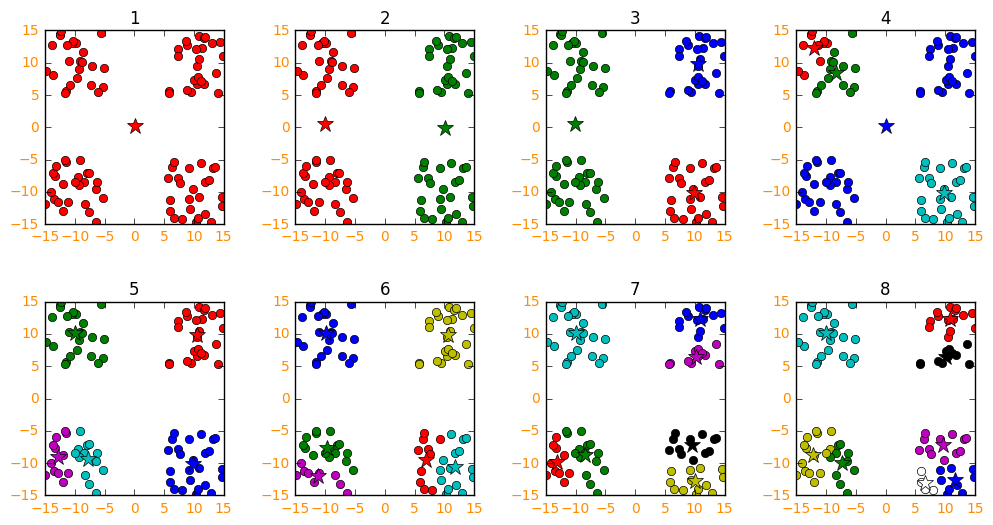

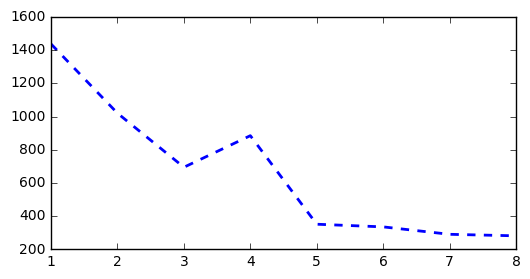

In [4]:
# -*- coding: utf-8 -*-    
from numpy import *  
import time  
import matplotlib.pyplot as plt  
  
  
#随机200个坐标点 (-10~10)  
def getdataSet():  
    dataSet=mat(zeros((100, 2)))  
    numSamples = dataSet.shape[0]    
    offset=[[-10,-10],[-10,10],[10,-10],[10,10]]#分类  
    for i in range(numSamples):  
        dataSet[i] =random.uniform(-5,5)+offset[i%4][0],random.uniform(-5,5)+offset[i%4][1]#偏移  
         
    return dataSet  
  
  
# 欧式距离  
def euclDistance(vector1, vector2):  
    return sqrt(sum(power(vector2 - vector1, 2)))  
  
# 总误差  
def getcost(clusterAssment):    
    len = clusterAssment.shape[0]    
    Sum = 0.0    
    for i in range(len):    
        Sum = Sum + clusterAssment[i, 1]    
    return Sum   
  
# 用随机样本初始化centroids    
def initCentroids(dataSet, k):    
    numSamples, dim = dataSet.shape    
    centroids = zeros((k + 1, dim))      
    s = set()    
    for i in range(1, k + 1):    
        while True:    
            index = int(random.uniform(0, numSamples))    
            #随机数去重  
            if index not in s:    
                s.add(index)    
                break          
        centroids[i, :] = dataSet[index, :]    
    return centroids  
  
# k-means主算法  
def kmeans(dataSet, k):  
    numSamples = dataSet.shape[0]  
  
    # 第一列存这个样本点属于哪个簇  
    # 第二列存这个样本点和样本中心的误差  
    clusterAssment = mat(zeros((numSamples, 2)))  
    for i in range(numSamples):  
        clusterAssment[i, 0] = -1  
    clusterChanged = True  
  
    # step 1: 初始化centroids  
    centroids = initCentroids(dataSet, k)  
  
    # 如果收敛完毕，则clusterChanged为False  
    while clusterChanged:  
        clusterChanged = False  
        # 对于每个样本点  
        for i in range(numSamples):  
            minDist = 0xfffff  
            minIndex = 0  
            # 对于每个样本中心  
            # step 2: 找到最近的样本中心  
            for j in range(1, k + 1):  
                distance = euclDistance(centroids[j, :], dataSet[i, :])  
                if distance < minDist:  
                    minDist = distance  
                    minIndex = j  
  
            # step 3: 更新样本点与中心点的分配关系  
            if clusterAssment[i, 0] != minIndex:  
                clusterChanged = True  
                clusterAssment[i, :] = minIndex, minDist  
            else:  
                clusterAssment[i, 1] = minDist  
  
        # step 4: 更新样本中心       
        for j in range(1, k + 1):  
            pointsInCluster = dataSet[nonzero(clusterAssment[:, 0].A == j)[0]]  
            centroids[j, :] = mean(pointsInCluster, axis=0)  
    return centroids, clusterAssment  
  
x=[1, 2, 3, 4, 5, 6, 7, 8]    
y=[0, 0, 0, 0, 0, 0, 0, 0]  
  
dataSet =getdataSet()  
print(dataSet)  
  
plt.figure('k-means',figsize=(12, 6))   
for index in range(8):        
    k = x[index]   
    centroids, clusterAssment = kmeans(dataSet, k)         
    #print(clusterAssment)  
    y[index]=getcost(clusterAssment)  
    print("x: ",k," y: ",y[index])  
    plt.subplot(2, 4, index+1) 
    #plt.subplot(2, 4, index+1,facecolor=(0.5,0.5,0.5))  
    numSamples, dim = dataSet.shape  
    mark = ['or', 'og', 'ob', 'oc', 'om', 'oy', 'ok', 'ow']  
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i, 0])  
        plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex-1])  
    mark = ['*r', '*g', '*b', '*c', '*m', '*y', '*k', '*w']  
    for i in range(1,k+1):  
        plt.plot(centroids[i, 0], centroids[i, 1], mark[i-1], markersize = 12)  
    plt.subplots_adjust(wspace=0.4, hspace=0.4)   
    plt.xticks(fontsize=10, color="darkorange")    
    plt.yticks(fontsize=10, color="darkorange")   
    plt.title(index+1)   
plt.figure('K enum',figsize=(6, 3))   
plt.plot(x, y, "b--", linewidth=2)    
plt.show()  
  